# Comparing Torsions Between QM, ANI-2x, and OFF

In [57]:
from openff.toolkit.topology import Molecule
import qcportal as ptl
client = ptl.FractalClient()
client

FractalClient(server_name='The MolSSI QCArchive Server', address='https://api.qcarchive.molssi.org:443/', username='None')

Select OFF 1.0.0 data

In [2]:
ds = client.get_collection("TorsionDriveDataset", "OpenFF-benchmark-ligand-fragments-v1.0")

Make a plot so that all data is requested from qcportal (otherwise stuff is missing from dataframe)

In [12]:
ds.visualize([ds.df.iloc[0].name], "default", units="kJ / mol")

Load structure of ejm 46 or 31

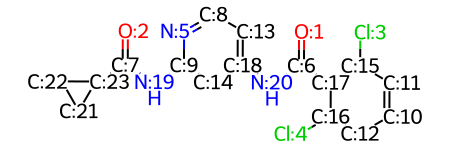

In [250]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

# ejm 31
#parent_smiles = "[H][c]1[n][c]([N]([H])[C](=[O])[C]([H])([H])[H])[c]([H])[c]([N]([H])[C](=[O])[c]2[c]([Cl])[c]([H])[c]([H])[c]([H])[c]2[Cl])[c]1[H]"
# ejm 46
parent_smiles = "[O:1]=[C:6]([c:17]1[c:15]([Cl:3])[c:11]([H:26])[c:10]([H:25])[c:12]([H:27])[c:16]1[Cl:4])[N:20]([c:18]1[c:13]([H:28])[c:8]([H:24])[n:5][c:9]([N:19]([C:7](=[O:2])[C:23]2([H:36])[C:21]([H:32])([H:33])[C:22]2([H:34])[H:35])[H:30])[c:14]1[H:29])[H:31]"

# Print parent structure
m = Chem.MolFromSmiles(parent_smiles)
m

Now, search through the database for any fragments which are substructures of ejm 46.

In [251]:
subfrags = []

for frag in ds.df.iloc:
    substructure = Chem.MolFromSmiles(frag.name)
    m = Chem.MolFromSmiles(parent_smiles)
    if m.GetSubstructMatches(substructure):
        subfrags.append(frag.name)

In [252]:
df_filtered = ds.df[ds.df.index.isin(subfrags)]
df_filtered["ani2x-v2"]

[H]c1c([c:1]([c:2](c(c1[H])[H])[C:3](=[O:4])N([H])[H])[H])[H]                                TorsionDriveRecord(id='30049485', status='COMP...
[H]c1c([c:1]([c:2](c(c1[H])Cl)[C:3](=[O:4])N([H])c2c(c(nc(c2[H])[H])[H])[H])Cl)[H]           TorsionDriveRecord(id='30049707', status='COMP...
[H]c1c(c(c(c(c1[H])Cl)[C:4](=O)[N:3]([H])[c:2]2[c:1](c(nc(c2[H])[H])[H])[H])Cl)[H]           TorsionDriveRecord(id='30049709', status='ERROR')
[H]c1c(c(c(c(c1[H])Cl)[C:2](=[O:1])[N:3]([H])[c:4]2c(c(nc(c2[H])[H])[H])[H])Cl)[H]           TorsionDriveRecord(id='30049710', status='ERROR')
[H]c1c(c([n:1][c:2](c1[H])[N:3]([H])[C:4](=O)C([H])([H])[H])[H])[H]                          TorsionDriveRecord(id='30049711', status='COMP...
[H]c1c(n[c:4](c(c1N([H])C(=O)[H])[H])[N:3]([H])[C:2](=O)[C:1]([H])([H])[H])[H]               TorsionDriveRecord(id='30049712', status='COMP...
[H]c1c(c([n:1][c:2](c1[H])[N:3]([H])[C:4](=O)C2(C(C2([H])[H])([H])[H])[H])[H])[H]            TorsionDriveRecord(id='30049720', status='COMP...

Visualise fragment

In [253]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

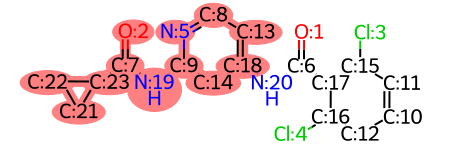

In [264]:
target_frag = subfrags[7]
substructure = Chem.MolFromSmiles(target_frag)
m = Chem.MolFromSmiles(parent_smiles)
m.GetSubstructMatches(substructure)
m

[H:13][c:1]1[c:2]([c:4]([n:10][c:5]([c:3]1[H:15])[N:11]([H:22])[C:6](=[O:12])[C:9]2([C:7]([C:8]2([H:19])[H:20])([H:17])[H:18])[H:21])[H:16])[H:14]


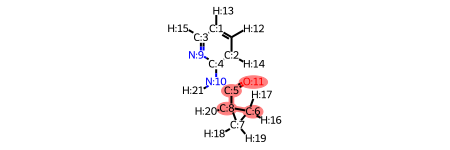

In [265]:
entry = ds.get_entry(target_frag)
driven_ats = entry.td_keywords.dihedrals[0]
smiles = entry.attributes["canonical_isomeric_explicit_hydrogen_mapped_smiles"]
print(smiles)
frag = Molecule.from_mapped_smiles(smiles)
frag = frag.to_rdkit()
frag.__sssAtoms = driven_ats
mol_with_atom_index(frag)

In [267]:
ds.visualize(target_frag, ["openff-1.0.0", "ani2x-v2", "gaff-2.11", "default"], units="kcal / mol")
#ds.visualize(target_frag, ["openff-1.0.0", "gaff-2.11", "default"], units="kcal / mol")